In [3]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os

In [4]:
# Files to Load
city_data_to_load = os.path.join('.', 'Resources', 'city_data.csv')
ride_data_to_load = os.path.join('.', 'Resources', 'ride_data.csv')

In [5]:
# Read the City Data and Store in a DataFrame
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [6]:
# Read the Ride Data and Store in a DataFrame
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [7]:
# Find null data in city data
city_data_df.isna().sum()

city            0
driver_count    0
type            0
dtype: int64

In [9]:
# Determine data types of city data
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [10]:
city_data_df['type'].value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [11]:
# Find null data in ride data
ride_data_df.isna().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [12]:
# Determine data types of ride data
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [13]:
# Combine the two data sets
pyber_data_df = pd.merge(ride_data_df, city_data_df, how = 'left', on = ['city', 'city'])

# Display dataframe to make sure merge was successful
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [14]:
# Create the Urban Cities DataFrame
urban_cities_df = pyber_data_df.loc[pyber_data_df['type']=='Urban']
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [15]:
# Create the Suburban Cities DataFrame
suburban_cities_df = pyber_data_df.loc[pyber_data_df['type']=='Suburban']
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [16]:
# Create the Rural Cities DataFrame
rural_cities_df = pyber_data_df.loc[pyber_data_df['type']=='Rural']
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [20]:
# Get the number of rides for urban cities
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [21]:
# Get the number of rides for suburban cities
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [22]:
# Get the number of rides for suburban cities
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [25]:
# Get the average fare for urban cities
urban_average_fare = urban_cities_df.groupby(['city']).mean()['fare']
urban_average_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [26]:
# Get the average fare for suburban cities
suburban_average_fare = suburban_cities_df.groupby(['city']).mean()['fare']

# Get the average fare for rural cities
rural_average_fare = rural_cities_df.groupby(['city']).mean()['fare']

In [27]:
# Get the average number of drivers for each urban city
urban_average_drivers = urban_cities_df.groupby(['city']).mean()['driver_count']
urban_average_drivers.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [28]:
# Get the average number of drivers for suburban each city
suburban_average_drivers = suburban_cities_df.groupby(['city']).mean()['driver_count']

# Get the average number of drivers for each rural city
rural_average_drivers = rural_cities_df.groupby(['city']).mean()['driver_count']

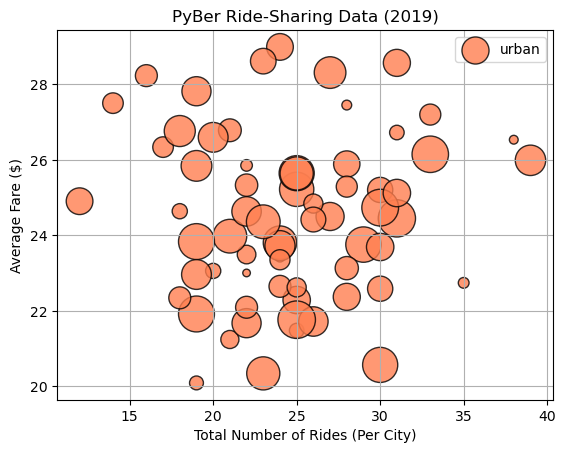

In [30]:
# Build the scatter plot for urban cities
plt.scatter(urban_ride_count, urban_average_fare, s=10*urban_average_drivers, color='coral', edgecolor = 'black', 
             linewidths=1, alpha=0.8, label='urban')
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid()
plt.legend()
plt.show()

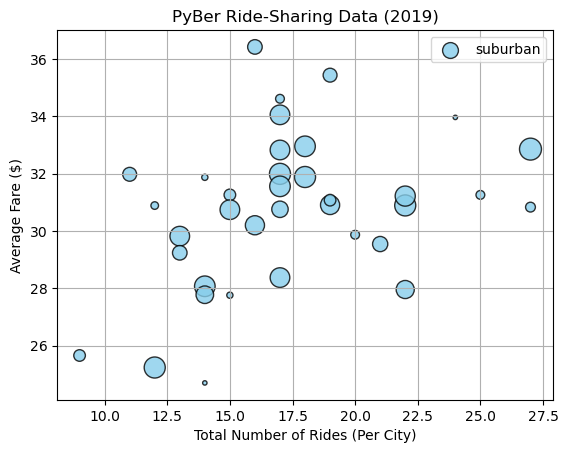

In [32]:
# Build the scatter plot for suburban cities
plt.scatter(suburban_ride_count, suburban_average_fare, s=10*suburban_average_drivers, color='skyblue', edgecolor = 'black', 
             linewidths=1, alpha=0.8, label='suburban')
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid()
plt.legend()
plt.show()

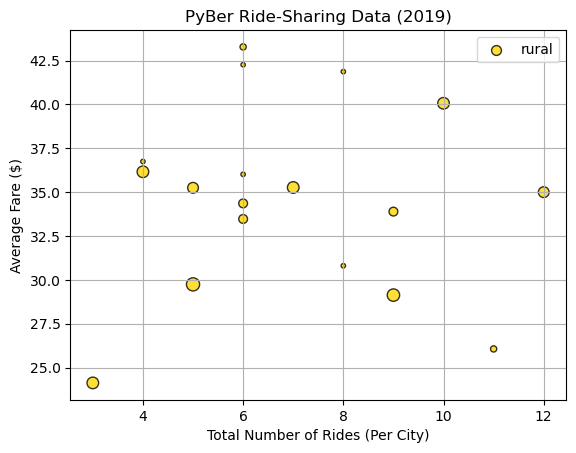

In [33]:
# Build the scatter plot for rural cities
plt.scatter(rural_ride_count, rural_average_fare, s=10*rural_average_drivers, color='gold', edgecolor = 'black', 
             linewidths=1, alpha=0.8, label='rural')
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid()
plt.legend()
plt.show()

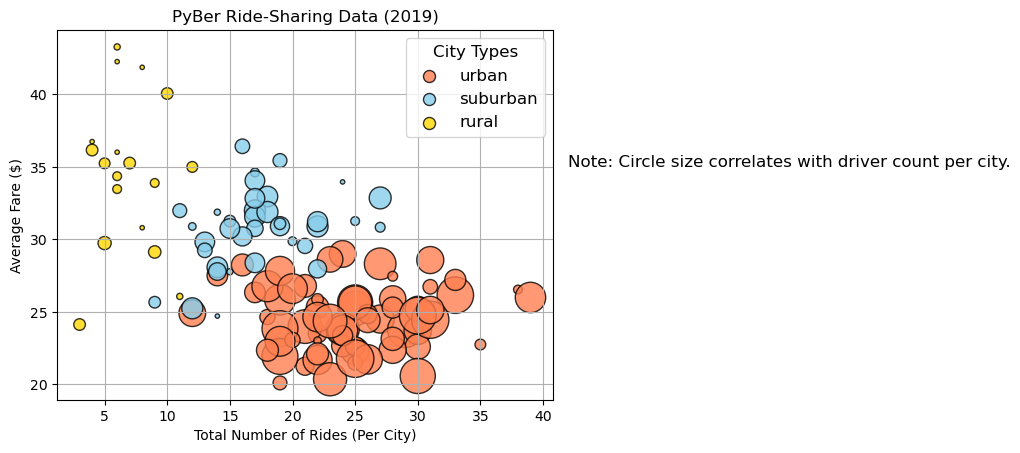

In [37]:
# Combine all three scatter plots
plt.scatter(urban_ride_count, urban_average_fare, s=10*urban_average_drivers, color='coral', edgecolor = 'black', 
             linewidths=1, alpha=0.8, label='urban')
plt.scatter(suburban_ride_count, suburban_average_fare, s=10*suburban_average_drivers, color='skyblue', edgecolor = 'black', 
             linewidths=1, alpha=0.8, label='suburban')
plt.scatter(rural_ride_count, rural_average_fare, s=10*rural_average_drivers, color='gold', edgecolor = 'black', 
             linewidths=1, alpha=0.8, label='rural')
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid()
# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")
# Save the figure.
plt.savefig("analysis/Fig1.png")

plt.show()